In [ ]:
%pip install matplotlib
%pip install pandas
%pip install numpy 

In [ ]:
%pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Cleaning

In [151]:
#load data into DataFrame
df=pd.read_csv(r"mentalhealth.csv")

# delete rows with zero 
df=df.dropna()

In [152]:
#check data types
df.dtypes

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors                int64
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

In [153]:
# check info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 287162 entries, 3 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                287162 non-null  object
 1   Gender                   287162 non-null  object
 2   Country                  287162 non-null  object
 3   Occupation               287162 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           287162 non-null  object
 6   treatment                287162 non-null  object
 7   Days_Indoors             287162 non-null  int64 
 8   Growing_Stress           287162 non-null  object
 9   Changes_Habits           287162 non-null  object
 10  Mental_Health_History    287162 non-null  object
 11  Mood_Swings              287162 non-null  object
 12  Coping_Struggles         287162 non-null  object
 13  Work_Interest            287162 non-null  object
 14  Social_Weakness          

In [154]:
# check the columns
print(df.columns)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [155]:
# change the headers to lowercase
df.columns = [col.lower() for col in df.columns]
df

,timestamp,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
3,8/27/2014 11:37:59,Female,United States,Corporate,No,Yes,Yes,1,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43:36,Female,United States,Corporate,No,Yes,Yes,1,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49:51,Female,Poland,Corporate,No,No,Yes,1,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52:41,Female,United States,Corporate,No,No,No,1,Yes,No,Yes,Medium,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25:34,Male,United States,Business,Yes,Yes,Yes,2,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38:35,Male,South Africa,Business,No,Yes,Yes,2,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59:38,Male,United States,Business,No,Yes,No,2,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07:35,Male,United States,Business,No,Yes,Yes,2,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


### Data Cleaning

In [156]:
# stats summary of days indoors column: other column are categorical values so I will change them into numerical values for analysis later.
print(df.describe())

        days_indoors
count  287162.000000
mean        2.963205
std         1.420193
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000


In [157]:
# check missing data
missing_values = df.isnull().sum()
print(missing_values) 

timestamp                  0
gender                     0
country                    0
occupation                 0
self_employed              0
family_history             0
treatment                  0
days_indoors               0
growing_stress             0
changes_habits             0
mental_health_history      0
mood_swings                0
coping_struggles           0
work_interest              0
social_weakness            0
mental_health_interview    0
care_options               0
dtype: int64


> Remove the duplicated data and coping struggles column.

In [158]:
# check duplicate data 
duplicate_rows = df[df.duplicated()]

In [159]:
print(f"Number of fully duplicated rows: {df.duplicated().sum()}")

Number of fully duplicated rows: 354


In [160]:
df = df.drop_duplicates()

In [161]:
# drop the coping struggles column
df = df.drop(columns=['coping_struggles'])
print(df.columns)

Index(['timestamp', 'gender', 'country', 'occupation', 'self_employed',
       'family_history', 'treatment', 'days_indoors', 'growing_stress',
       'changes_habits', 'mental_health_history', 'mood_swings',
       'work_interest', 'social_weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')


> Label Encoder Module from Scikit-learn was imported to process the data.

In [164]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [165]:
df['gender_encoded']= le.fit_transform(df['gender'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Female': np.int64(0), 'Male': np.int64(1)}


In [166]:
df['stress_encoded']= le.fit_transform(df['growing_stress'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Maybe': np.int64(0), 'No': np.int64(1), 'Yes': np.int64(2)}


In [167]:
df['occupation_encoded']=le.fit_transform(df['occupation'])
print(dict(zip(le.classes_,le.transform(le.classes_))))

{'Business': np.int64(0), 'Corporate': np.int64(1), 'Housewife': np.int64(2), 'Others': np.int64(3), 'Student': np.int64(4)}


### Data Analysis

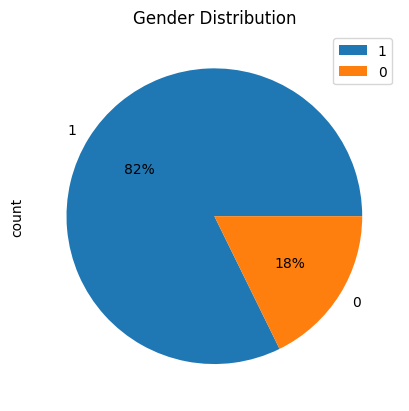

In [169]:
# pie chart for Gender Distribution
explode = (0.03, 0.03, 0.03)
series = df["gender_encoded"].value_counts()
series.plot(kind='pie', autopct = '%1.00f%%')
plt.title('Gender Distribution')
plt.legend(loc='best')
plt.show()

According to this pie-chart, we can see most participants are male. 

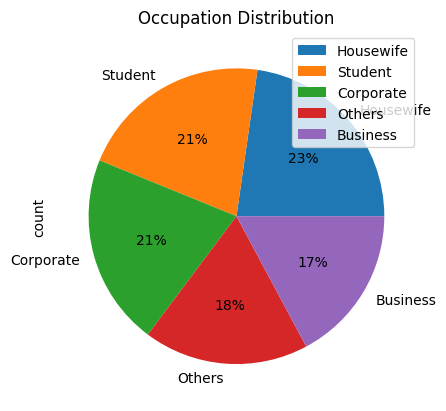

In [170]:
# pie chart for Occupation Distribution
explode = (0.03, 0.03, 0.03)
series = df["occupation"].value_counts()
series.plot(kind='pie', autopct = '%1.00f%%')
plt.title('Occupation Distribution')
plt.legend(loc='best')
plt.show()

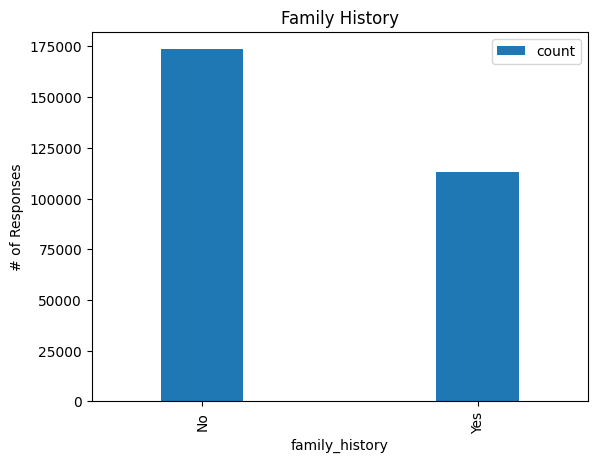

In [171]:
# Chart of respondants with Family History
series = df["family_history"].value_counts()
series.plot(kind='bar', width = 0.3)
plt.title('Family History')
plt.ylabel('# of Responses')
plt.legend(loc='best')
plt.show()

**I want to expore the data and find some insights.** 

Therefore, I want to check - 
1) What is the prevlance of stress and gender?
2) Which occupations have the highest stress rates?

#### ***1) What is the prevalance of stress and gender?***

The __[formula](https://www.ncbi.nlm.nih.gov/books/NBK430867/)__ I used here is *Prevalence = (Total number with condition) / (Population at risk for the condition)*

In [ ]:
total_male = len(df[df['gender_encoded']==0])
total_female = len(df[df['gender_encoded']==1])

total_male_with_condition = len(df[(df['gender_encoded']==0) & (df['stress_encoded'].isin([0,2]))])
total_female_with_condition = len(df[(df['gender_encoded']==0) & (df['stress_encoded'].isin([0,2]))])

prevalence_male = total_male_with_condition/total_male
prevalence_female = total_female_with_condition/total_female

In [172]:
print(f"Prevalence of stress among males: {prevalence_male:.2%}")
print(f"Prevalence of stress among females: {prevalence_female:.2%}")

Prevalence of stress among males: 69.84%
Prevalence of stress among females: 15.05%


#### ***2) Which occupations have the highest stress rates?*** 

In [173]:
print(df['occupation'].unique())

['Corporate' 'Student' 'Business' 'Housewife' 'Others']


This was calculated by grouping the data by Occupation, 
<br> counting how many people in each role answered "yes" to growing_stress, 
<br> and dividing that by the total number of people in that occupation. 
<br>The result is a percentage that reflects how prevalent stress is within each job category.

In [ ]:
total_business_persons = len(df['occupation_encoded']==0)
total_corporate_persons=len(df['occupation_encoded']==1) 
total_housewife_persons=len(df['occupation_encoded']==2)
total_other_persons=len(df['occupation_encoded']==3) 
total_student_persons=len(df['occupation_encoded']==4) 

In [174]:
business_persons=len(df[(df['occupation_encoded']==0) & (df['stress_encoded'].isin([2]))])
corporate_persons=len(df[(df['occupation_encoded']==1) & (df['stress_encoded'].isin([2]))])
housewife_persons=len(df[(df['occupation_encoded']==2) & (df['stress_encoded'].isin([2]))])
other_persons=len(df[(df['occupation_encoded']==3) & (df['stress_encoded'].isin([2]))])
student_persons=len(df[(df['occupation_encoded']==4) & (df['stress_encoded'].isin([2]))])

In [ ]:
business = business_persons/total_business_persons
corporate = corporate_persons/total_corporate_persons
housewife = housewife_persons/total_housewife_persons
other = other_persons/total_other_persons
student = student_persons/total_student_persons

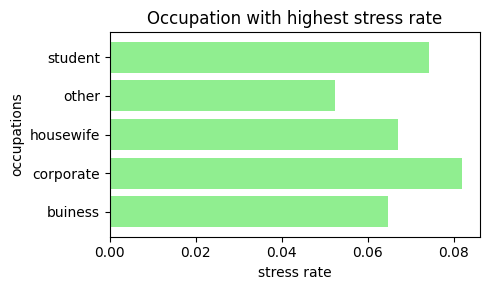

In [175]:
# plot:
x=["buiness","corporate","housewife","other","student"]
#values against each values of y
y=[business,corporate,housewife,other,student]

fig = plt.figure()
fig.set_figwidth(5) 
fig.set_figheight(3) 

plt.barh(x, y, color='lightgreen')
plt.xlabel("stress rate")
plt.ylabel("occupations")
plt.title("Occupation with highest stress rate")
plt.tight_layout()
plt.savefig('occupations_stress', bbox_inches='tight')
plt.show()

In [ ]:
#print(df['country'].unique())